# Calibration analysis - Average several runs

Notebook to compute the mean of the calibration parameters for PMT with several runs

* open the panda files
* compute averages and std
* plots results

Author: J.A. Hernando

Version: v01

In [1]:
# general imports
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import tables
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

In [2]:
idate, ihour = time.strftime("%d/%m/%Y"), time.strftime("%H:%M:%S")
print('last visit {} at {}'.format(idate, ihour))

last visit 22/11/2016 at 14:50:25


## Read the panda files with the calibration parameters of different runs

In [3]:
idir = '/Users/hernando/Investigacion/NEXT/Data/NEWStar/pmtcalib/161117/'
runs = [2843, 2844, 2845]

In [4]:
def getpan(irun):
    ifile = 'calf_R'+str(irun)+'_pg_panda.h5'
    store = pd.HDFStore(idir+ifile)
    pan = store.df
    return pan

pans = map(getpan, runs)

In [5]:
nruns = len(runs)
def var(label,k):
    return np.array(map(lambda i: pans[i][label][k], range(nruns)))

nsens = 12
sens = range(nsens)

## Create a panda with the average and std of the parameters

In [6]:
labels = map(str, pans[0].columns)
print(labels)
dopan = {}
for label in labels:
    vmean, vstd = [], []
    for i in range(nsens):
        xvar = var(label,i)
        vmean.append(np.mean(xvar))
        vstd.append(np.std(xvar))
    dopan[label] = np.array(vmean)
    dopan['e'+label] =np.array(vstd)
opan = pd.DataFrame(dopan)

['indexes', 'sensorID', 'chi2', 'ntot', 'sntot', 'pedestal', 'spedestal', 'gain', 'sgain', 'pes', 'spes', 'noise', 'snoise', 'noisepe', 'snoisepe']


In [7]:
opan

,chi2,echi2,egain,eindexes,enoise,enoisepe,entot,epedestal,epes,esensorID,...,ntot,pedestal,pes,sensorID,sgain,snoise,snoisepe,sntot,spedestal,spes
0,0.865099,0.100698,4.958878,0.0,0.287866,2.312054,173.064619,0.160210,0.085917,0.0,...,74772.559238,0.054017,0.423005,0.0,0.575418,0.062814,0.358184,267.419681,0.077589,0.015047
1,0.900190,0.045131,1.012323,0.0,0.082451,0.723864,51.524886,0.198711,0.167839,0.0,...,74676.412768,0.032616,0.443344,1.0,0.590451,0.056898,0.421328,268.260446,0.076082,0.013891
2,0.914978,0.036246,0.475770,0.0,0.021971,0.361981,38.633282,0.147233,0.138073,0.0,...,74665.497290,0.159270,0.349269,2.0,0.430316,0.049937,0.370579,270.489801,0.070933,0.008249
3,0.856107,0.099811,0.242172,0.0,0.024924,0.249253,14.855227,0.069604,0.098758,0.0,...,74678.311599,-0.023747,0.245342,3.0,0.484724,0.038801,0.382047,260.545097,0.052450,0.006432
4,0.641372,0.028174,0.446473,0.0,0.031230,0.257461,57.149937,0.170684,0.118217,0.0,...,74647.741185,0.051376,0.291607,4.0,0.632989,0.061852,0.497991,228.055037,0.094219,0.010457
5,0.788858,0.025551,0.399306,0.0,0.085063,0.271979,27.084305,0.106340,0.137017,0.0,...,74695.559138,0.110717,0.323149,5.0,0.526361,0.055129,0.437953,250.788031,0.092631,0.011436
6,0.855621,0.032310,0.260761,0.0,0.036059,0.200285,16.283709,0.085588,0.114947,0.0,...,74694.284147,0.121000,0.279187,6.0,0.280103,0.028796,0.254261,260.146080,0.039476,0.004861
7,1.050877,0.079694,0.145049,0.0,0.050259,0.304333,36.271333,0.154773,0.118098,0.0,...,74664.520914,0.188190,0.276615,7.0,0.236744,0.028428,0.246185,289.425151,0.035458,0.003034
8,0.791826,0.087007,0.184429,0.0,0.012355,0.253059,37.833298,0.057707,0.144972,0.0,...,74702.199447,0.057472,0.339627,8.0,0.453848,0.045029,0.362994,250.320556,0.073571,0.010849
9,0.791758,0.091513,0.394275,0.0,0.004956,0.407370,53.860870,0.070934,0.123801,0.0,...,74697.416073,0.014963,0.299493,9.0,0.383320,0.038668,0.327531,250.675645,0.054056,0.006363


In [8]:
opan.to_csv(idir+'pmt_calib_summary.cvs')
opan.to_hdf(idir+'pmt_calib_summary.h5','df',mode='w',format='table',data_columns=True)

### Plots the results

In [9]:
import Calib.calib as sc

def xyey_(pan, label):
    x = pan['indexes']
    y = pan[label]
    ey = pan['e'+label]
    vals = zip(x.values,y.values,ey.values)
    vals.sort()
    x = np.array(map(lambda val: val[0], vals))
    y = np.array(map(lambda val: val[1], vals))
    ey = np.array(map(lambda val: val[2], vals))
    return x,y,ey

def polo_sens(pan, labels):
    n = len(labels)
    nx, ny, figsize = sc.plt_subplots(n)
    fig, axes = plt.subplots(nx, ny, figsize=figsize)
    plt.suptitle('calibration PMTS')
    for i, label in enumerate(labels):
        ax = plt.subplot(nx, ny, i+1)
        x, y, ey = xyey_(pan, label)
        ax.errorbar(x, y, ey, fmt='o', label='IC')
        ax.legend()
        plt.xlim(-1.,12.)
        ax.set_title(label)
    fig.tight_layout()
    plt.show()
    return fig

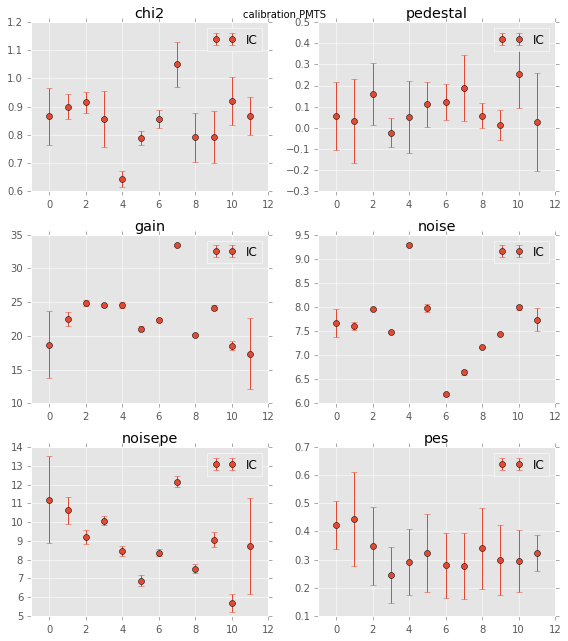

In [10]:
ilabels = ['chi2','pedestal','gain','noise','noisepe','pes']
fig = polo_sens(opan, ilabels)
fig.savefig(idir+'pmt_calib_summary.pdf')

## Compare with DB

In [11]:
def polo_par_compare(val1, eval1, val2, eval2, label1='DB', label2='IC', xlim=(-2, 14)):
    fig, ax = plt.subplots()
    ids = range(len(val1))
    ax.errorbar(ids, val1, yerr=eval1, fmt='o', color='red', label=label1)
    ax.errorbar(ids, val2, yerr=eval2, fmt='*', color='blue', label=label2)
    ax.set_xlim(xlim)
    ax.set_ylim(0, max(max(val1), max(val2))+5)
    ax.legend()
    return fig

In [12]:
import Database.loadDB as db
pmtdb = db.DataPMT()

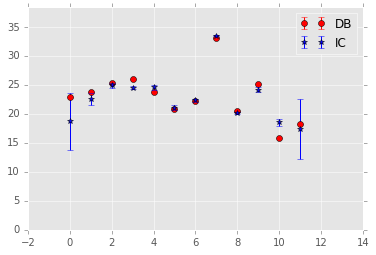

In [13]:
fig = polo_par_compare(-1*pmtdb['adc_to_pes'], np.zeros(12), opan['gain'], opan['egain'])
fig.savefig(idir+'calf_compare_DB.pdf')
# fig = polo_par_compare(pmtdb['Sigma'], np.zeros(12), pan['noisepe'], pan['snoisepe'])
# pdf.savefig(fig)

In [14]:
import calib as sc

again = [22.91, 23.75, 25.3, 25.99, 23.70, 20.89, 22.13, 33.09, 20.43, 25.16, 15.85, 18.21]
aegain = [0.14, 0.17, 0.09, 0.09, 0.08, 0.11, 0.08, 0.06, 0.11, 0.07, 0.25, 0.15]

anoise_pe = [9.69, 10.73, 9.27, 9.88, 8.32, 7.03, 7.85, 12.01, 7.18, 8.72, 7.20, 8.17] 
aenoise_pe = [0.12, 0.14, 0.10, 0.09, 0.09, 0.11, 0.09, 0.07, 0.11, 0.08, 0.18, 0.13]


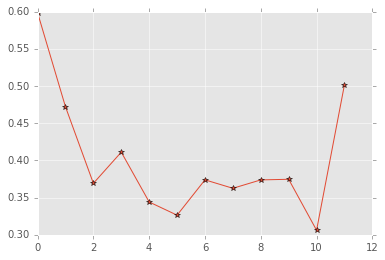

In [16]:
rat = opan['noisepe']/opan['gain']
plt.plot(rat, marker='*');